In [ ]:
from scwfae.data.ptbxlDS import PtbxlAllChanDS
import torch
from torch.utils.data import random_split, DataLoader
from train_gaussian import OldCVAE
from ptbxlae.modeling.convolutionalModules import ConvolutionalEcgEncoderDecoderSharedParams

torch.manual_seed(42)

-- SCWFAE --


In [2]:
ds = PtbxlAllChanDS(lowres=True)
_, val_ds = random_split(ds, lengths=[0.9, 0.1])
val_dl = DataLoader(val_ds, batch_size=len(val_ds))

sig, labels = next(iter(val_dl))
labels

{'CD': tensor([ True, False, False,  ...,  True,  True, False]),
 'HYP': tensor([False, False, False,  ..., False, False, False]),
 'MI': tensor([False, False, False,  ...,  True,  True,  True]),
 'NORM': tensor([False,  True,  True,  ..., False, False, False]),
 'STTC': tensor([ True, False, False,  ..., False, False, False])}

In [3]:
mi_sig = sig[labels['MI'], :, :]
mi_sig.shape

torch.Size([428, 12, 1000])

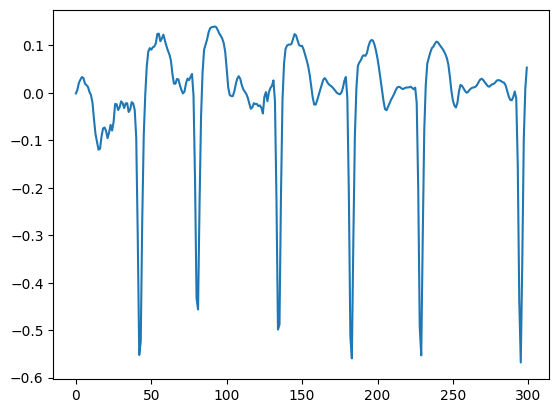

In [4]:
import matplotlib.pyplot as plt

plt.plot(mi_sig[8, 3, 0:300])

In [ ]:
LATENT_DIM = 8

m = OldCVAE(
        ConvolutionalEcgEncoderDecoderSharedParams(
            seq_len=1000,
            n_channels=1,
            kernel_size=15,
            conv_depth=5,
            fc_depth=1,
            fc_scale_factor=4,
            latent_dim=25,
        )
    ).to("cuda")# m.load_state_dict(torch.load('cache/archivedmodels/ecgvae_f8l64.pt', weights_only=True))
m.load_state_dict(torch.load('cache/savedmodels/ecgvae.pt', weights_only=True))
m.eval()
m

ConvolutionalEcgVAE(
  (encoder): ConvolutionalEcgEncoder(
    (conv1): Conv1d(1, 32, kernel_size=(7,), stride=(1,), padding=(3,))
    (conv2): Conv1d(32, 1024, kernel_size=(3,), stride=(1,), padding=(1,))
  )
  (decoder): ConvolutionalEcgDecoder(
    (conv1): ConvTranspose1d(1024, 32, kernel_size=(3,), stride=(1,))
    (conv2): ConvTranspose1d(32, 1, kernel_size=(7,), stride=(1,))
  )
  (fc_mean): Linear(in_features=1024, out_features=8, bias=True)
  (fc_logvar): Linear(in_features=1024, out_features=8, bias=True)
  (fc_decode): Linear(in_features=8, out_features=1024, bias=True)
)

In [23]:
# recon, _, _ = m.encoder(mi_sig[8, 3, :].view(1,1000))

# # recon.shape
# # mi_sig[8, 3, :].view(1,1,1000).shape
# recon.shape

samp = torch.randn((32, 1, 1000)).to("cpu")
samp.shape

# recon, _, _ = m(samp)

# recon.shape


torch.Size([32, 1, 1000])